In [1]:
# Imports
import pandas as pd
import numpy as np
import random
import seaborn as sns
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definir a semente aleatória para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Carregando os Dados

In [3]:
# Carregar o dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

## Análise de Clusterização

In [4]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Selecionar as variáveis para análise de clusterização
variables = ['emissoesCO2e', 'populacao', 'qtdContratos', 'totalFinanciado', 'areaFinanciada']
data_cluster = data[variables]

In [6]:
# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

In [7]:
# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):  # Testar k de 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

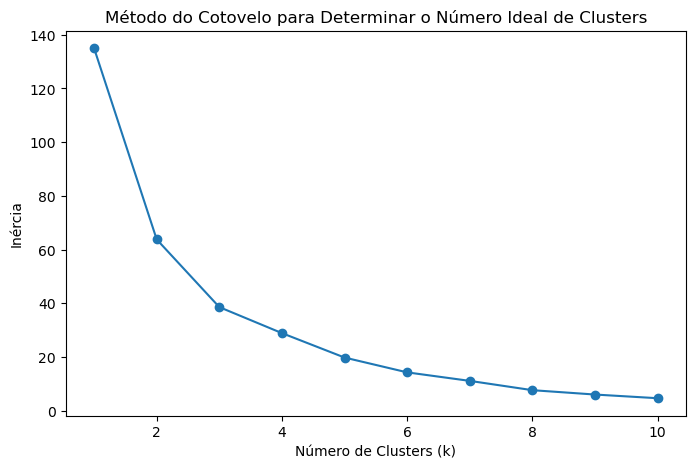

In [8]:
# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.show()

In [9]:
# Aplicar K-Means com o número de clusters ideal (escolhido manualmente após o gráfico)
n_clusters = 3  # Ajuste conforme o gráfico do cotovelo
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

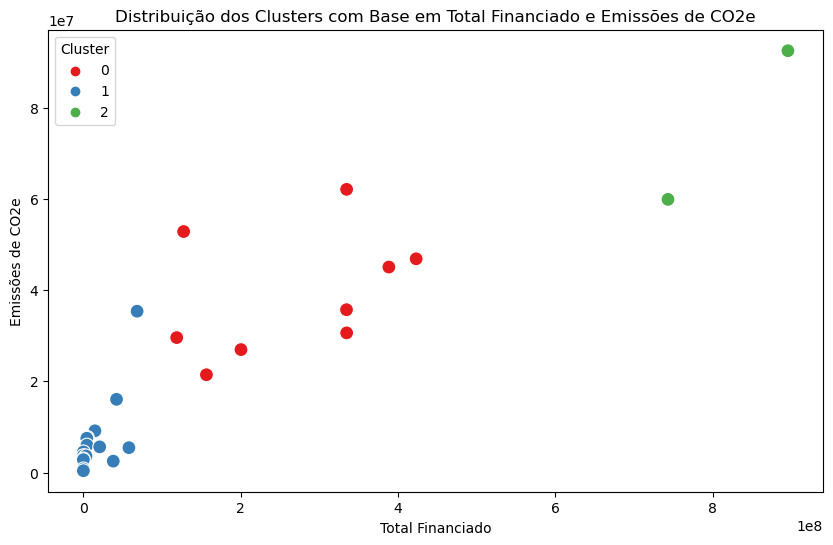

In [10]:
# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='totalFinanciado', 
    y='emissoesCO2e', 
    hue='Cluster', 
    data=data, 
    palette='Set1', 
    s=100
)
plt.xlabel('Total Financiado')
plt.ylabel('Emissões de CO2e')
plt.title('Distribuição dos Clusters com Base em Total Financiado e Emissões de CO2e')
plt.legend(title='Cluster')
plt.show()

In [11]:
# Visualizar a média das variáveis em cada cluster
cluster_summary = data.groupby('Cluster')[variables].mean()

# Convertendo as colunas população e contratos para números inteiros
cluster_summary['populacao'] = cluster_summary['populacao'].astype(int)
cluster_summary['qtdContratos'] = cluster_summary['qtdContratos'].astype(int)

# Formatando as demais colunas para uma casa decimal
cluster_summary['emissoesCO2e'] = cluster_summary['emissoesCO2e'].round(1)
cluster_summary['totalFinanciado'] = cluster_summary['totalFinanciado'].round(1)
cluster_summary['areaFinanciada'] = cluster_summary['areaFinanciada'].round(1)

#Resultado
print("Média das variáveis por Cluster:")
cluster_summary

Média das variáveis por Cluster:


,emissoesCO2e,populacao,qtdContratos,totalFinanciado,areaFinanciada
Cluster,,,,,
0,39012868.1,1376636,189,268749656.7,53074.8
1,7146542.3,641399,18,16188105.5,2720.7
2,76170174.9,1460107,510,819632629.5,177657.3


# Fim